# LAB: Evaluación de Modelos

## 1. Introducción

El objetivo de este LAB es realizar la evaluación de un modelos de clasificación partiendo "desde cero". Para ello, usaremos datos de transacciones inmobiliaras en Sacramento.



Importemos los paquetes requeridos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

plt.style.use('seaborn-white')
%matplotlib inline

Carguemos el dataset de Sacramento:

In [2]:
sac = pd.read_csv('../Data/Sacramentorealestatetransactions.csv')

Crear una variable binaria en la cual:

+ $Y = 1$ indica que la casa fue vendida por encima de 200.000 dólares
+ $Y = 0$ indica que la casa fue vendida por igual o menos de 200.000 dólares

Quedarse con las siguientes variables: `number of beds`, `baths`, `sq_ft` y el indicador de precio que generamos en el paso anterior

In [3]:
sac.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
sac.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [20]:
def classify_price(s):
    s['high_price'] = int(s['price'] > 200000)
    return s

sac = sac.apply(classify_price, axis = 1)

In [25]:
X = sac[['beds', 'baths', 'sq__ft']]
y = sac[['high_price']]

Dividan el dataset entre training y test sets. Los predictores son `beds`, `baths` y `sq ft`. El target es la variable de precio.
El tamaño del test set debe ser 33% y (opcionalmente) pueden intentar estratificar por el target.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Fitear un modelo de regresión logística:

In [29]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=1e10)
lr_model.fit(X_train, y_train)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Imprimir la matriz de confusión:

In [33]:
y_pred = lr_model.predict(X_test)

Calcular la proporción de casos correctamente clasificados, la precisión y el recall.

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))

accuracy: 0.61963190184
precision: 0.643518518519
recall: 0.747311827957


[[ 63  77]
 [ 47 139]]


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


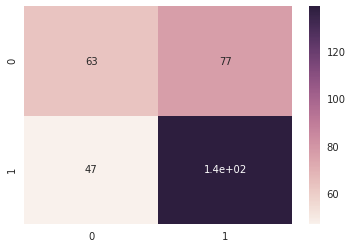

In [40]:
% matplotlib inline
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

heatmap(cf_matrix, annot=True)

¿Qué dicen estas tres medidas acerca del modelo?

Supongamos que un vendedor inmboliario quiere priorizar minimizar los falsos positivos (predecir que una casa se va a vender por encima de \$200.000 cuando en realidad se vende por menos) porque este tipo de errores le hacen "perder plata".

Cambiar el umbral de decisión para **bajar la tasa de falsos positivos** e imprimir nuevamente la matriz de confusión.

* ¿Cuál sería el lado "negativo" de bajar la tasa de falsos positivos?

Graficar la curva ROC usando las funciones provistas más arriba.

**Bonus:** ¿Cuándo pueden ser las métricas precision y recall más útiles que la curva ROC?

Tienden a ser más útiles cuando la proporción de casos positivos es menor, dado que ambas métricas son sensibles a esto.

## BONUS: Evaluar otros modelos

Evaluar otros clasificadores además de una regresión logística para este dataset.